## Global optimisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for the 3d projection in the next cell

# Example function
def fm(p):
    x, y = p
    return ((np.sin(x) + 0.05*x**2) + (np.sin(y) + 0.05*y**2))

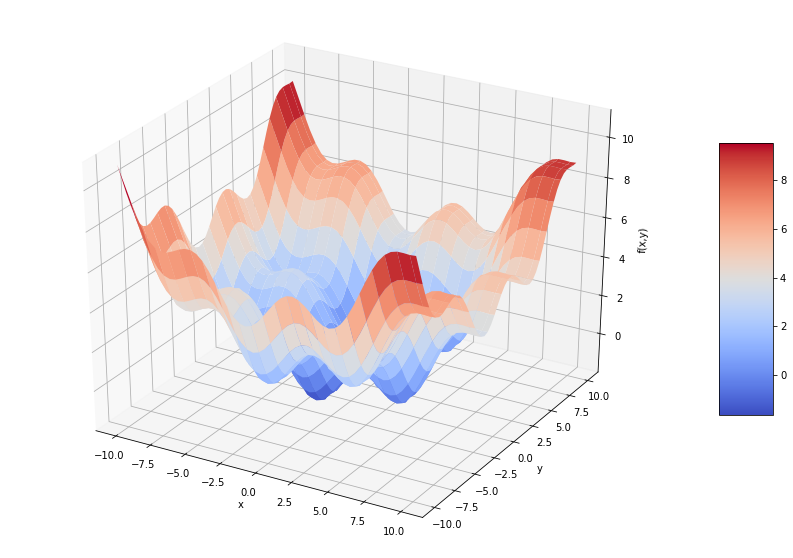

In [2]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', lw=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

Clearly lots of local minima, but how to identify the global minimum?

In [33]:
import scipy.optimize as sco  # Contains the sco.brute() and sco.fmin() for finding global and local minima respectively

def fo(p):
    x, y = p
    z = (np.sin(x) + 0.05*x**2) + (np.sin(y) + 0.05*y**2)
    if output == True:
        print('x = {:5.4f}, y = {:5.4f}, z = {:5.4f}'.format(x, y, z))
    return z

In [34]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  # Brute force optimisation. The tuples are ranges, and step size

x = -10.0000, y = -10.0000, z = 11.0880
x = -10.0000, y = -5.0000, z = 7.7529
x = -10.0000, y = 0.0000, z = 5.5440
x = -10.0000, y = 5.0000, z = 5.8351
x = -10.0000, y = 10.0000, z = 10.0000
x = -5.0000, y = -10.0000, z = 7.7529
x = -5.0000, y = -5.0000, z = 4.4178
x = -5.0000, y = 0.0000, z = 2.2089
x = -5.0000, y = 5.0000, z = 2.5000
x = -5.0000, y = 10.0000, z = 6.6649
x = 0.0000, y = -10.0000, z = 5.5440
x = 0.0000, y = -5.0000, z = 2.2089
x = 0.0000, y = 0.0000, z = 0.0000
x = 0.0000, y = 5.0000, z = 0.2911
x = 0.0000, y = 10.0000, z = 4.4560
x = 5.0000, y = -10.0000, z = 5.8351
x = 5.0000, y = -5.0000, z = 2.5000
x = 5.0000, y = 0.0000, z = 0.2911
x = 5.0000, y = 5.0000, z = 0.5822
x = 5.0000, y = 10.0000, z = 4.7471
x = 10.0000, y = -10.0000, z = 10.0000
x = 10.0000, y = -5.0000, z = 6.6649
x = 10.0000, y = 0.0000, z = 4.4560
x = 10.0000, y = 5.0000, z = 4.7471
x = 10.0000, y = 10.0000, z = 8.9120


array([0., 0.])

In [35]:
# Shrink step size to refine results
output = False

opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print(opt1)
print(fo(opt1))

[-1.4 -1.4]
-1.7748994599769203


## Local optimisation

In [36]:
# Inputs to sco.fmin() are the initial values as well as some tolerance figures
output = True
sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)  # Last two are max number of iterations and function calls

x = -1.4000, y = -1.4000, z = -1.7749
x = -1.4700, y = -1.4000, z = -1.7743
x = -1.4000, y = -1.4700, z = -1.7743
x = -1.4700, y = -1.3300, z = -1.7696
x = -1.4175, y = -1.4350, z = -1.7756
x = -1.3475, y = -1.4350, z = -1.7722
x = -1.4394, y = -1.4088, z = -1.7755
x = -1.4569, y = -1.4438, z = -1.7751
x = -1.4427, y = -1.4328, z = -1.7756
x = -1.4208, y = -1.4591, z = -1.7752
x = -1.4347, y = -1.4213, z = -1.7757
x = -1.4096, y = -1.4235, z = -1.7755
x = -1.4344, y = -1.4305, z = -1.7757
x = -1.4516, y = -1.4168, z = -1.7753
x = -1.4260, y = -1.4305, z = -1.7757
x = -1.4257, y = -1.4396, z = -1.7756
x = -1.4325, y = -1.4259, z = -1.7757
x = -1.4241, y = -1.4259, z = -1.7757
x = -1.4177, y = -1.4304, z = -1.7757
x = -1.4288, y = -1.4270, z = -1.7757


array([-1.42876755, -1.42702972])

In [39]:
opt2 = np.array([-1.42876755, -1.42702972])  # Last line of the output above
print(fo(opt2))

x = -1.4288, y = -1.4270, z = -1.7757
-1.7757246992183862


Generally a good idea to have a brute force global minimisation run before applying the local one. This avoids local minimisation falling into local minima and not being able to get out

## Constrained optimisation

Imagine the following constraints: Investor invests in two risky securities which cost $q_a = q_b = \$10$

After one year, in state $u$ they payoff $\$15$ and $\$5$ respectively

After one year, in state $d$ they payoff $\$5$ and $\$12$ respectively

Both states are equally likely. Denote vector payoffs for the two securities by $r_a$ and $r_b$

The investor has a budget of $\$100$ to invest and derives utility from future wealth according to the utility function $u(w)=\sqrt{w}$ where $w$ = wealth in USD

If the numbers of the securities purchased by the investor are $a$ and $b$, then the maximization problem can be written as<br>
<br>
$\mathrm{max}_{a,b}\mathrm{E}(u(w_1))=p\sqrt{w_{1,u}} + (1-p)\sqrt{w_{1,d}}$ The $p$ here is the probability of that outcome occuring. Remember that this is an expected value expression <br>
$w_1 = a\times r_a + b\times r_b$<br>
$w_0\geq a\times q_a + b\times q_b$<br>
$a,b\geq 0$

Given the initial setup, this results in<br>
$\mathrm{min}_{a,b} - \mathrm{E}(u(w_1))=-(0.5\sqrt{w_{1,u}}+0.5\sqrt{w_{1,d}})$ The 0.5 factors here correspond to the idea that ending up in state $u$ or $d$ is equally likely.<br>
$w_{1,u} = 15a + 5b$<br>
$w_{1,d} = 5a + 12b$<br>
$100\geq 10a + 10b$<br>
$a,b\geq 0$

In [54]:
# Solve the above problem with sco.minimize(). This takes as inputs
# arg1 function to be minimised
# arg2 conditions in the form of equalities and inequalities passed as a list of dict objects
# arg3 boundaries for the parameters passed as a tuple of tuple objects

import math

def Eu(p):  # The function to be MINIMIZED in order to MAXIMIZE the expected utility
    s, b = p
    return -(0.5*math.sqrt(s*15 + b*5) + 0.5*math.sqrt(s*5 + b*12))

cons = ({'type': 'ineq', 'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  # The inequality as a dict object. It's been rearranged to be a > 0 inequality

bnds = ((0, 10), (0, 10))  # Bounary values as a tuple of tuples. Arbitrarily wide?

result = sco.minimize(Eu, [5,5], method='SLSQP', bounds=bnds, constraints=cons)

In [55]:
print(result)
print('\n')
print(result['x'])
print('\n')
print(-result['fun'])  # Negative minimum function value is the optimal solution value
print('\n')
print(np.dot(result['x'], [10, 10]))  # The budget constraint is binding, all wealth is invested

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])


[8.02547122 1.97452878]


9.700883611487832


99.99999999999999


In the above calculation, the output result['x'] is the tuple (s, b) in the actual function call that minimises the negative of the expected utility (equivalent to maximising the positive expected utility). In other words, result['x'] are the numbers of the respective securities purchased by the investor ($a$ and $b$ in initial setup).

The last print statement of $x\,\times$ [10, 10] is just multiplying the initial values of the securities by the portfolio weighting. Because this is pretty much $=\$100$, we conclude that the money is fully invested.

In [56]:
result['x'].sum()  # This adds to ten because you specified in the initial constraints that 100 > 10a + 10b

10.0

## Integration

The risk-neural values of derivatives can be expressed as the discounted expectation of their payoff. (i.e. You can expect a certain value at maturity, and then the current value is calculated by discounting that expectation backward with the relevant interest rate..?)

The expectation being considered here is a sum in the discrete case, and an integral in the continuous case

In [19]:
# Using our example function, we'll integrate it with scipy.integrate
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5*x

# Define the limits of integration
a, b = 0.5, 9.5
x = np.linspace(0, 10)
y = f(x)
Ix = np.linspace(a, b)  # x axis within integration limits
Iy = f(Ix)  # y values within integration limits

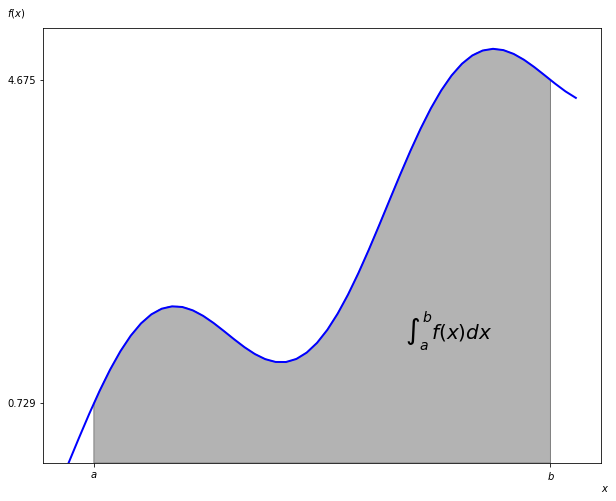

In [21]:
from matplotlib.patches import Polygon  # This enables you to shade certain regions of a plot

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x, y, 'b', lw=2)
plt.ylim(bottom=0)

verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]  # Coordinates for the shaded region
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])
plt.show()

In [25]:
# Three different methods of integration that take function handle and limits as inputs:

print(sci.fixed_quad(f, a, b)[0])  # Fixed Gaussian Quadrature

print(sci.quad(f, a, b)[0])  # Adaptive Quadrature

print(sci.romberg(f, a, b))  # Romberg integration

24.366995967084602
24.374754718086752
24.374754718086713


In [27]:
# Two different methods of integration that take list inputs of the function values and x axis

print(sci.trapz(f(Ix), Ix))  # Trapezoidal rule

print(sci.simps(f(Ix), Ix))  # Simpson's rule

24.369481200672436
24.37461808392504


## Integration by simulation

Options and derivatives can be priced by monte carlo simulation, which hinges on the idea that you can evaluate an integral by simulation:

1) Draw I random values of x between integration limits<br>
2) Evaluate the function at all the random values of x<br>
3) Sum up all the evaluations and take the average. This gives an average function value over the integration range<br>
4) Multiply this value by the length of the integration interval to get an estimate for the integral value

In [29]:
# This code shows that the monte carlo estimated integral value converges (although not monotonically) to the real one as I becomes large
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i*10) * (b - a) + a  # Number of random x values is increased with every iteration
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic python

In [31]:
import sympy as sy  # Introduces a new class of objects: The symbol

x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [32]:
sy.sqrt(x)

sqrt(x)

In [33]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [36]:
f = x**2 + 3 + 0.5*x**2 + 3/2
sy.simplify(f)

1.5*x**2 + 4.5

In [44]:
# When solving symbolic expression, sympy expects the expression to be equated to zero
print(sy.solve(x**2 - 3))
print(sy.solve(x**2 + y**2))

[-sqrt(3), sqrt(3)]
[{x: -I*y}, {x: I*y}]


In [55]:
# Symbolic integration of our example function. Need to first define all the variables as symbols

a, b = sy.symbols('a b')
I = sy.Integral(sy.sin(x) + 0.5*x, (x, a, b))  # Define the integral

sy.init_printing(pretty_print=True, use_latex=True)
print(sy.pretty(I))  # sy.pretty() make it look a little nicer

int_func = sy.integrate(sy.sin(x) + 0.5*x, x)  # Do the integration symbolically
print(sy.pretty(int_func))

Fb = int_func.subs(x, 9.5).evalf()  # If you use a or b here it won't give numerical results because a and b ares symbols
Fa = int_func.subs(x, 0.5).evalf()
print(Fb - Fa)  # Actual integral value after substituting in the limits to the integral.

print(sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5)))  # Can also do the integration and substitution in a single step

# Differentiation is also handled by the sympy library.

b                    
⌠                    
⎮ (0.5⋅x + sin(x)) dx
⌡                    
a                    
      2         
0.25⋅x  - cos(x)
24.3747547180867
24.3747547180867


In [61]:
# Supergaussian (I know there isn't a closed form solution for this)

r = sy.symbols('r')
w = sy.symbols('w')
n = sy.symbols('n')
f = sy.exp(-(r/(2*w))**n)

#ft = sy.integrate(f, (r, 0, 10))
print(sy.pretty(ft))  # Could use a bit of work formatting, but impressive theres a close for it
print('\n')
print(ft)

         -1                                 -1                        
         ───                                ───                       
          n                                  n                        
    ⎛ -n⎞     ⎛1⎞  ⎛1   n  -n  -n⎞     ⎛ -n⎞     ⎛1⎞  ⎛1    n  -n  -n⎞
  w⋅⎝2  ⎠   ⋅Γ⎜─⎟⋅γ⎜─, 0 ⋅2  ⋅w  ⎟   w⋅⎝2  ⎠   ⋅Γ⎜─⎟⋅γ⎜─, 10 ⋅2  ⋅w  ⎟
              ⎝n⎠  ⎝n            ⎠               ⎝n⎠  ⎝n             ⎠
- ──────────────────────────────── + ─────────────────────────────────
             2  ⎛    1⎞                          2  ⎛    1⎞           
            n ⋅Γ⎜1 + ─⎟                         n ⋅Γ⎜1 + ─⎟           
                ⎝    n⎠                             ⎝    n⎠           


-w*(2**(-n))**(-1/n)*gamma(1/n)*lowergamma(1/n, 0**n*2**(-n)*w**(-n))/(n**2*gamma(1 + 1/n)) + w*(2**(-n))**(-1/n)*gamma(1/n)*lowergamma(1/n, 10**n*2**(-n)*w**(-n))/(n**2*gamma(1 + 1/n))
